# Machine Learning Titanic Courswork

## Courswork Task
“The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, **killing 1502 out of 2224 passengers and crew.** This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were **not enough lifeboats for the passengers and crew. Although there was some element of luck involved** in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.”

For this assignment you will **analyse the Titanic dataset with regards to predicting what categories of passengers were likely to survive** the sinking of the ocean liner. You will be **using machine learning methods to predict** as accurate as possible from general information about passengers which **passengers survived the tragedy.**

### Experiments

Develop a complete analysis pipeline in a programming language / environment of your choice. 

The objective of the analysis is to predict survivors of the Titanic disaster from the given data as accurately as possible.

There are no limitations with regards to the modelling approach, that is, you are free to explore (and report) as many methods, and their results, as you wish. The minimum requirement though is that you analyse the dataset using the following two classifiers:
- Logistic regression classifier
- Random forest classifier

You will report the results of your experiments through prediction, that is, classification accuracies with regard to correctly predicted survival rates.

# Data Dictionary & General Setup
The data provided for this assignment has been split into a training set and a test set, this test test set is also the ground truth.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Pallet
sns.set_palette("pastel")

In [2]:
# Importing Datasets
test_df = pd.read_csv('testdata_with_groundTruth.csv')
train_df = pd.read_csv('train.csv')

## Test Data

### Overview

In [3]:
print("Test Data Dimensions <Rows, Cols>: " + str(test_df.shape))
test_df.head(5)

Test Data Dimensions <Rows, Cols>: (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Quality
The 9 of the 12 columns are complete with no NaN's, Fare has one missing value, Age has 82 missing values and Cabin has 327 missing values. Age and Fare should be easy to impute based on other columns, but Cabin may be an issue and might not be worth imputing at all.

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Training Data

### Overview

In [5]:
print("Training Data Dimensions <Rows, Cols>: " + str(train_df.shape))
train_df.head(5)

Training Data Dimensions <Rows, Cols>: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Quality
10 out of the 12 columns have no NaN values. Age has 177 missing values and Cabin has 687 missing values. Similarly to the test set, Age will be easy to impute but Cabin may be an issue.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dictionary

|Attribute |Description |Possible Values |
|----------|------------|----------------|
|Survived  |If they Survived or not|0 = no, 1 = yes|
|Pclass    |Class of the passengers ticket|1 = First, 2 = Second and 3 = Third|
|Name      |Name of Passenger, including Title|Mr John Doe (String)|
|Sex       |Gender|Male, Female|
|Age       |Age of the passenger| 50 (Int)|
|Sibsp     |Number of Siblings/Spouses Aboard|2 (int)|
|Parch     |Number of Parents/Children Aboard|2 (int)|
|Ticket    |Ticket Number|PC127321 (String, no form)|
|Fare      |Fare Passenger paind for ticket|120 (int)|
|Cabin     |Cabin than Passenger had, if they had one|C123 (String)|
|Embarked  |Location they Boarded the Titanic|C = Cherbourg; Q = Queenstown; S = Southampton|

# Graphical Understanding of the Features
In this section I will graphical represent the features in the training data to see if there is any correlation between the values of the feature and if they survived or not. Im this I will not look at PassengerId as it is has been added after the event for data management purposes, Name as this is most likely unique to an indivdual and an overall trend should not be visable and Ticket as this is unique to an individual and an overall trend should not be visible.

## Pclass
For the survivors, there is not a lot of difference between the 3 classes, but second class had the least survivors. For the perished, third class had over 3 times as many as fatalities as any other class. When comparing the number of individuals per class, you can see that first and second class have similar passenger numbers with similar passenger survived/perished, but third class had the highest number of passengers but also the highest proportion of people that perished.

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


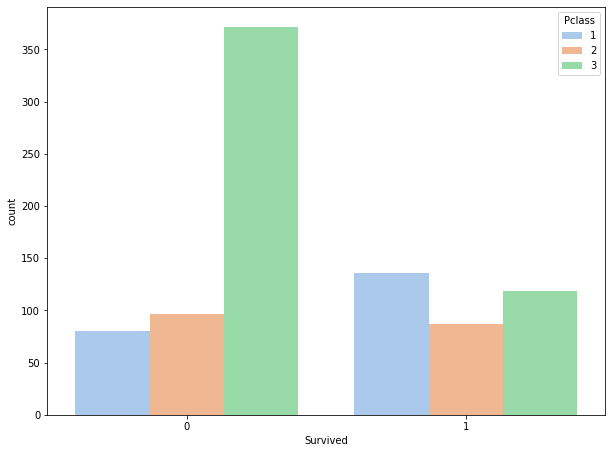

In [7]:
plt.figure(figsize = (10, 7.5))
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_df)
print(train_df.groupby(['Pclass']).count().iloc[:,0])

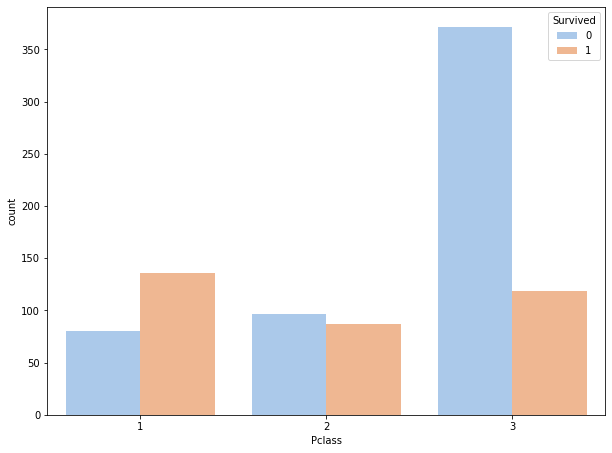

In [8]:
plt.figure(figsize = (10, 7.5))
sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived')

## Sex
When looking at Sex, it is clear that Males had the highest fatality rate.

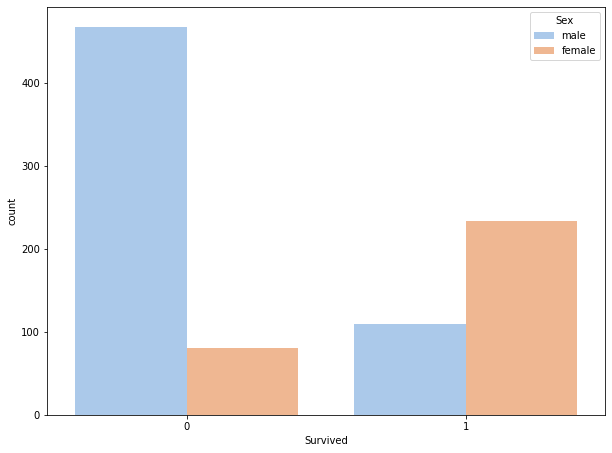

In [9]:
plt.figure(figsize = (10, 7.5))
sns.countplot(x = 'Survived', hue = 'Sex', data = train_df)

## Age
Children under 15 had the highest survivorship rate, with individuals aged 15 to 50 had a low chance of surviving. I suspect that Sex had a major role in determaning if you survived especially if you were over the age of 18.

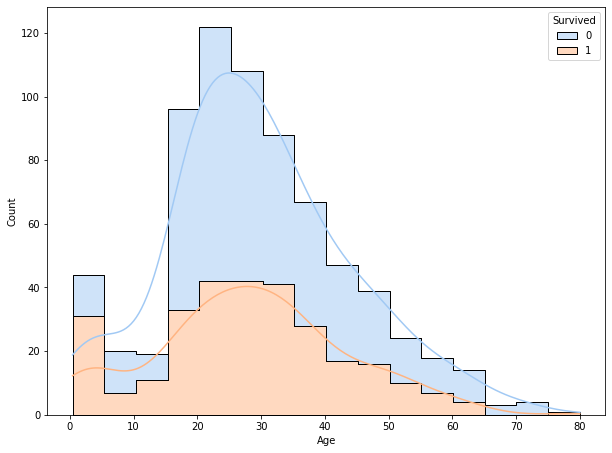

In [10]:
plt.figure(figsize = (10, 7.5))
sns.histplot(data = train_df, x="Age", hue = "Survived"
             , multiple = "stack", element = "step", kde = True, bins = 16)

## SibSp
Lone passengers had the highest fatlity rate.

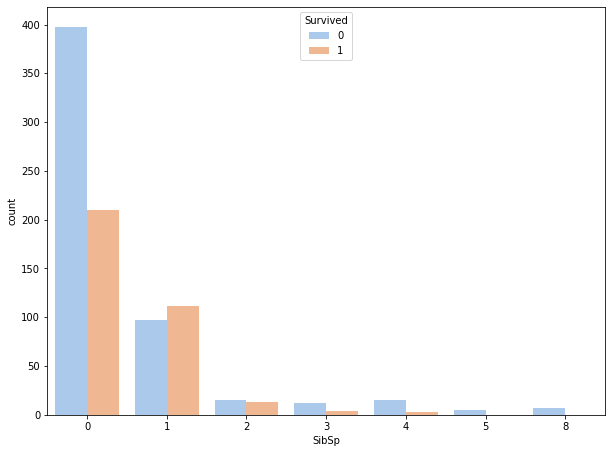

In [11]:
plt.figure(figsize = (10, 7.5))
sns.countplot(data = train_df, x="SibSp", hue = "Survived")

## Parch
Lone passengers had the highest fatility rate, with people that travelled with family tended to have a higher level of survival.

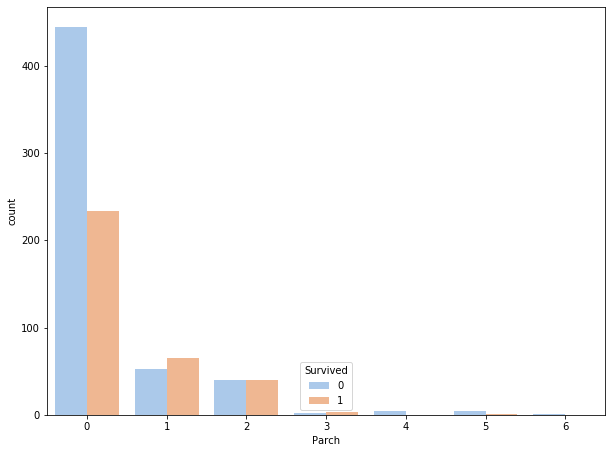

In [12]:
plt.figure(figsize = (10, 7.5))
sns.countplot(data = train_df, x="Parch", hue = "Survived")

## Fare
The majority of individuals had a low fare price, this is inline with the majority of passengers travelled third class.

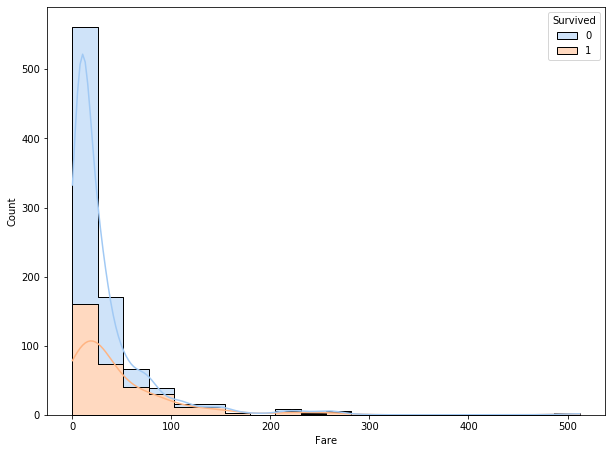

In [13]:
plt.figure(figsize = (10, 7.5))
sns.histplot(data = train_df, x="Fare", hue = "Survived"
             , multiple = "stack", element = "step", kde = True, bins = 20)

## Correlation Summary
Below is a correlation matrix between all the varibles, most notable the line comparing variables to Survived we can see that Pclass and Sex have some of the strongets correlations, these are negative correlations due to younger people having higher chance of survival and Female is assigned the numerical value 0.

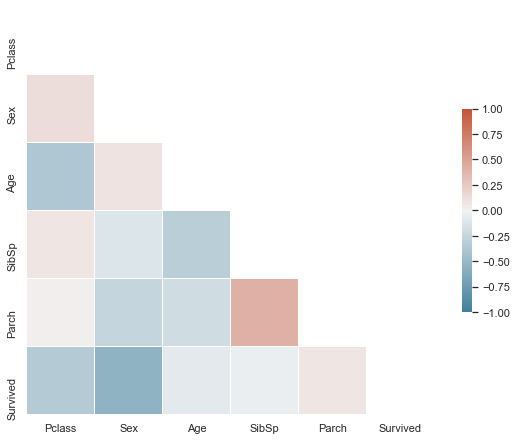

In [33]:
plt.figure(figsize = (10, 7.5))
train_df['Sex'] = train_df['Sex'].astype('category').cat.codes
#sns.heatmap(train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']])

corr = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})